### 특성 하나만 사용한 KNN 회귀

In [1]:
# 데이터 준비
import numpy as np

perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
    21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
    23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
    27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
    39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
    44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
    115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
    150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
    218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
    556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
    850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
    1000.0])

최근접 이웃 회귀(KNN Regression)
- `KNeighborsRegression()`은 일정 이웃 데이터 값의 <b>평균</b>으로 예측
- `RadiusNeighborsRegressor()`은 일정 거리내 데이터 값으 <b>평균</b>으로 예측

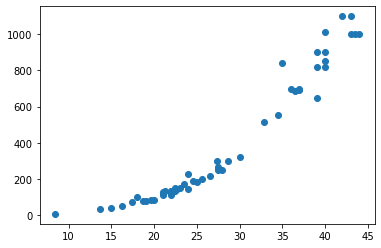

19.157142857142862

In [2]:
# 농어 길이만 사용하여 그래프 출력
import matplotlib.pyplot as plt

plt.scatter(perch_length, perch_weight)
plt.show()

# 훈련 세트 준비
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
  perch_length, perch_weight, random_state =42)

# 2차원 배열로 변경
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)
train_input

# 회귀 모델 생성 및 훈련 및 평가
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()
knr.fit(train_input, train_target)

# 결정계수
knr.score(test_input, test_target)

# 평균절대오차 MAE
from sklearn.metrics import mean_absolute_error

# test target 값,  test 예측값
mae = mean_absolute_error(test_target, knr.predict(test_input))
mae


In [3]:
# # 과대적합 과소적합

# # train과 test 데이터로 결정계수 점수 평가
# # knr.score(train_input, train_target), knr.score(test_input, test_target)
# # train은 0.969 test는 0.9928 -> 과소적합

# # 하이퍼 파라미터를 조정
# # 이웃 개수는 default가 5
# # 이웃개수가 1,3, 42로 했을때 비교
knr.n_neighbors = 1
knr.fit(train_input, train_target)
knr.score(train_input, train_target), knr.score(test_input, test_target)
# # 과대적합

knr.n_neighbors = 3
knr.fit(train_input, train_target)
knr.score(train_input, train_target), knr.score(test_input, test_target)

knr.n_neighbors = 42
knr.fit(train_input, train_target)
knr.score(train_input, train_target), knr.score(test_input, test_target)
#과소 적합

(0.0, -0.05511282928252759)

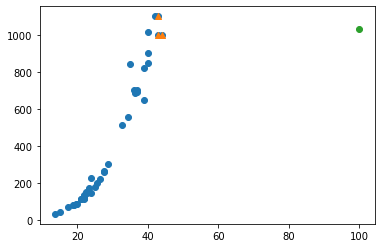

In [4]:
# 길이가 50cm 인 큰 농어
knr.n_neighbors = 3 
knr.fit(train_input, train_target)
knr.score(train_input, train_target), knr.score(test_input, test_target)
knr.predict([[50]])

dis, indexes = knr.kneighbors([[50]])
# plt.figure(figsize=(10,10))
plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker = "^")
plt.scatter(100, knr.predict([[100]]))
plt.show()

# 훈련데이터셋 범위 밖은 예측 구림 -> 데셋 확대가 필요

이웃 개수가1일때 훈련데이터 결정계수 0.9852830341215901, 테스트데이터 결정계수 0.991309195814175
이웃 개수가3일때 훈련데이터 결정계수 0.9804899950518966, 테스트데이터 결정계수 0.9746459963987609
이웃 개수가5일때 훈련데이터 결정계수 0.9698823289099254, 테스트데이터 결정계수 0.992809406101064
이웃 개수가10일때 훈련데이터 결정계수 0.96164569026043, 테스트데이터 결정계수 0.9737908255822255
이웃 개수가42일때 훈련데이터 결정계수 0.0, 테스트데이터 결정계수 -0.05511282928252759


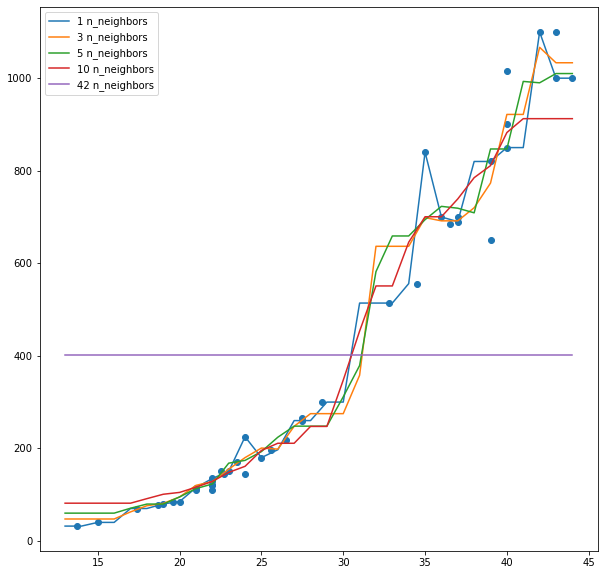

array([[13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24],
       [25],
       [26],
       [27],
       [28],
       [29],
       [30],
       [31],
       [32],
       [33],
       [34],
       [35],
       [36],
       [37],
       [38],
       [39],
       [40],
       [41],
       [42],
       [43],
       [44]])

In [11]:
# k에 따른 훈련과 테스트 결정계수의 변호 ㅏ그래프를 그리고 최적의 k를 찾아 출력

x = np.arange(13,45).reshape(-1,1)

plt.figure(figsize=(10,10))
plt.scatter(train_input, train_target)

for i in [1,3,5,10,42]:
  knr.n_neighbors = i
  knr.fit(train_input, train_target)
  pred = [knr.predict([j]) for j in x]
  plt.plot(x, pred, label = f'{i} n_neighbors')
  plt.legend()
  # print(f'이웃 개수가{i}일때 결정계수 점수 :{knr.score(train_input, train_target)}')
  print(f'이웃 개수가{i}일때 훈련데이터 결정계수 {knr.score(train_input, train_target)}, 테스트데이터 결정계수 {knr.score(test_input, test_target)}')
  # print(f'이웃 개수가{i}일때 훈련과 테스트 데이터의 결정계수차이  {knr.score(train_input, train_target) - knr.score(test_input, test_target)}')
plt.show()